In [1]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.0 MB/s eta 0:00:00


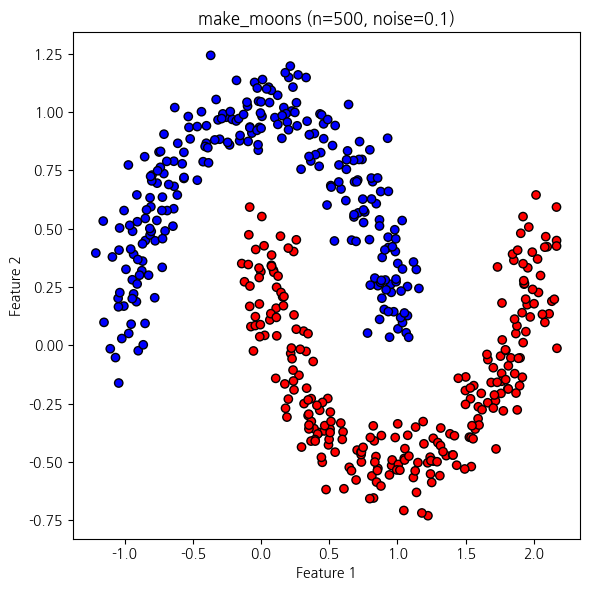

In [2]:

#1. 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

#2. 데이터 생성 및 시각화
# 샘플 수: 500, 노이즈: 0.1, 랜덤 시드: 42
dataset = make_moons(n_samples=500, noise=0.1, random_state=42)
X, y = dataset

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('make_moons (n=500, noise=0.1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()


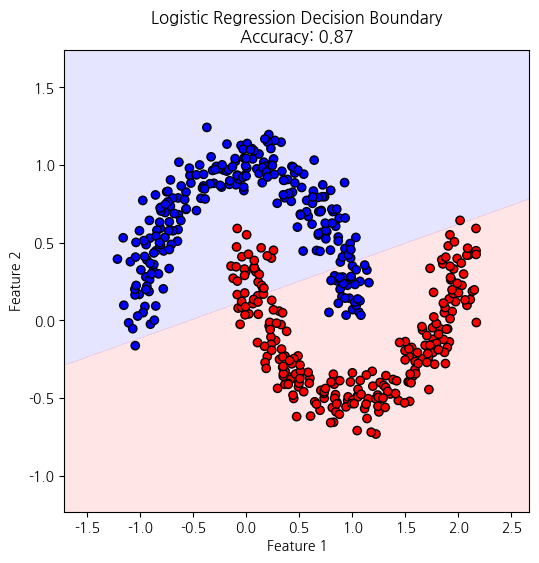

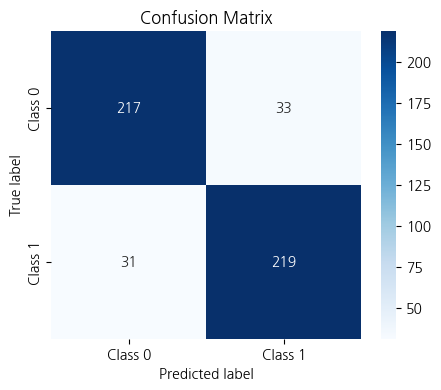

Accuracy: 0.87

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       250
           1       0.87      0.88      0.87       250

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [3]:
#3. 로지스틱 회귀 – 결정 경계ㆍSeaborn Heatmap 혼동 행렬ㆍClassification Report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 모델 학습
model_lr = LogisticRegression()
model_lr.fit(X, y)
y_pred = model_lr.predict(X)
acc = accuracy_score(y, y_pred)

# ── 결정 경계 시각화 ──
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_lr.predict_proba(grid)[:,1].reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='bwr')
plt.title(f'Logistic Regression Decision Boundary\nAccuracy: {acc:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ── Seaborn Heatmap으로 혼동 행렬 ──
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1'],
            yticklabels=['Class 0','Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# ── Classification Report ──
print(f'Accuracy: {acc:.2f}\n')
print(classification_report(y, y_pred))


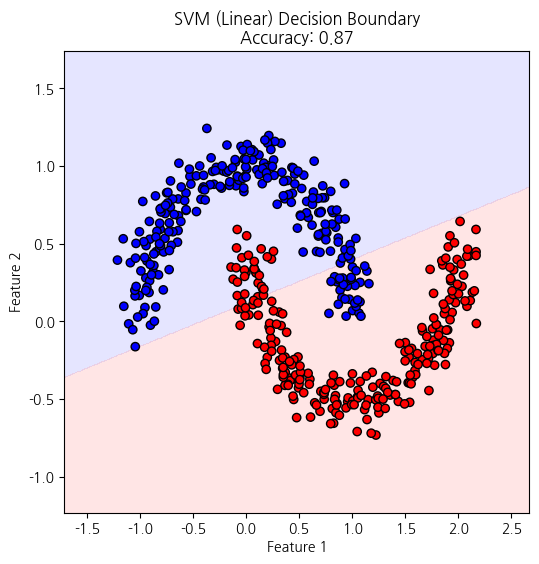

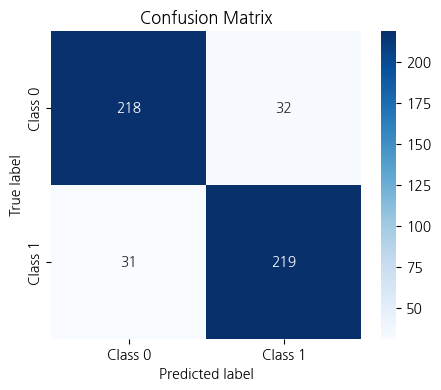

Accuracy: 0.87

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       250
           1       0.87      0.88      0.87       250

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [4]:
# SVM (Linear Kernel) – 결정 경계 · 혼동 행렬 · Classification Report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC           # 또는: from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ── 모델 학습 ──
model_svm_lin = SVC(kernel='linear', probability=True, random_state=42)
# 만약 LinearSVC를 쓰고 싶다면:
# from sklearn.svm import LinearSVC
# model_svm_lin = LinearSVC(random_state=42)
model_svm_lin.fit(X, y)
y_pred = model_svm_lin.predict(X)
acc = accuracy_score(y, y_pred)

# ── 결정 경계 시각화 ──
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_svm_lin.predict_proba(grid)[:,1].reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='bwr')
plt.title(f'SVM (Linear) Decision Boundary\nAccuracy: {acc:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ── Seaborn Heatmap으로 혼동 행렬 ──
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1'],
            yticklabels=['Class 0','Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# ── Classification Report ──
print(f'Accuracy: {acc:.2f}\n')
print(classification_report(y, y_pred))


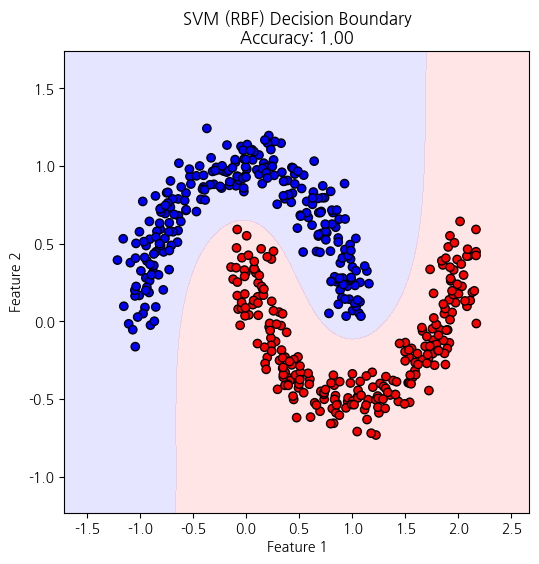

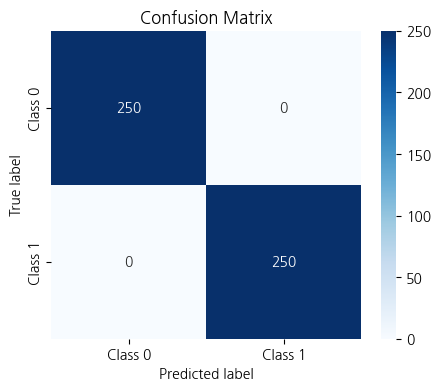

Accuracy: 1.00

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [5]:
#4. SVM (RBF 커널) – 결정 경계 · Seaborn Heatmap 혼동 행렬 · Classification Report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ── 모델 학습 ──
model_svm = SVC(kernel='rbf', probability=True, gamma='scale')
model_svm.fit(X, y)
y_pred = model_svm.predict(X)
acc = accuracy_score(y, y_pred)

# ── 결정 경계 시각화 ──
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_svm.predict_proba(grid)[:,1].reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='bwr')
plt.title(f'SVM (RBF) Decision Boundary\nAccuracy: {acc:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ── Seaborn Heatmap으로 혼동 행렬 ──
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1'],
            yticklabels=['Class 0','Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# ── Classification Report ──
print(f'Accuracy: {acc:.2f}\n')
print(classification_report(y, y_pred))


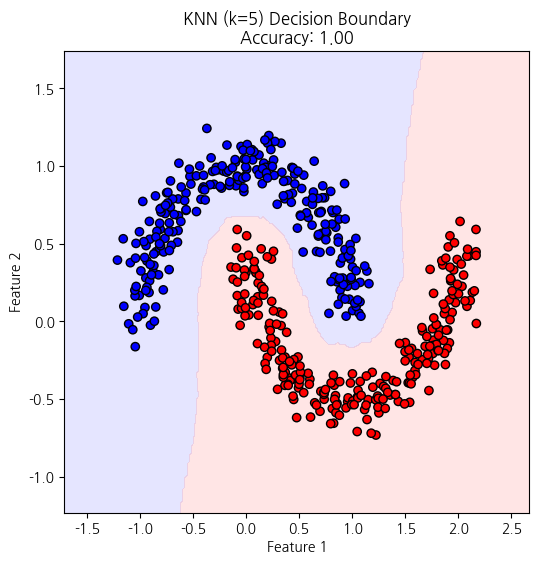

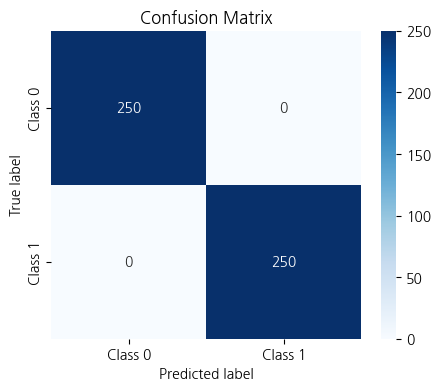

Accuracy: 1.00

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [6]:
#5. KNN (k=5) – 결정 경계 · Seaborn Heatmap 혼동 행렬 · Classification Report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ── 모델 학습 ──
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X, y)
y_pred = model_knn.predict(X)
acc = accuracy_score(y, y_pred)

# ── 결정 경계 시각화 ──
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_knn.predict_proba(grid)[:,1].reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='bwr')
plt.title(f'KNN (k=5) Decision Boundary\nAccuracy: {acc:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ── Seaborn Heatmap으로 혼동 행렬 ──
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1'],
            yticklabels=['Class 0','Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# ── Classification Report ──
print(f'Accuracy: {acc:.2f}\n')
print(classification_report(y, y_pred))


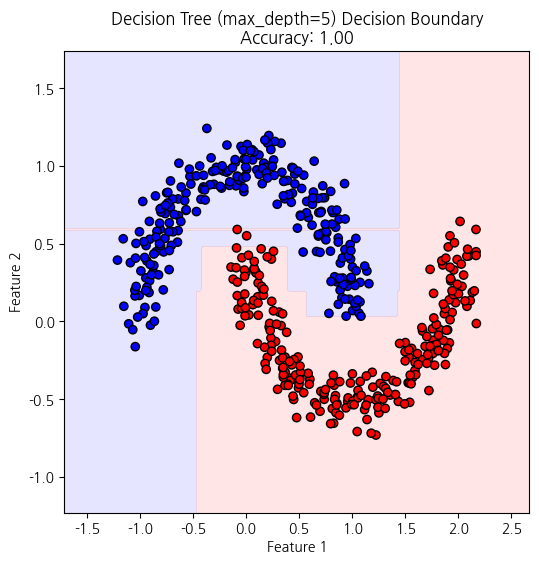

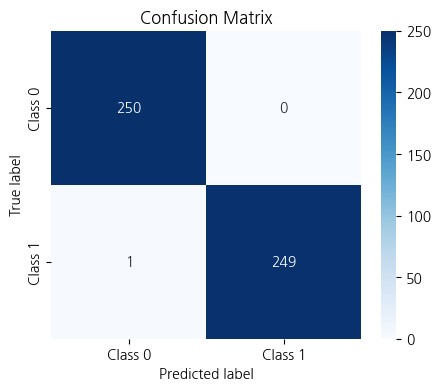

Accuracy: 1.00

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



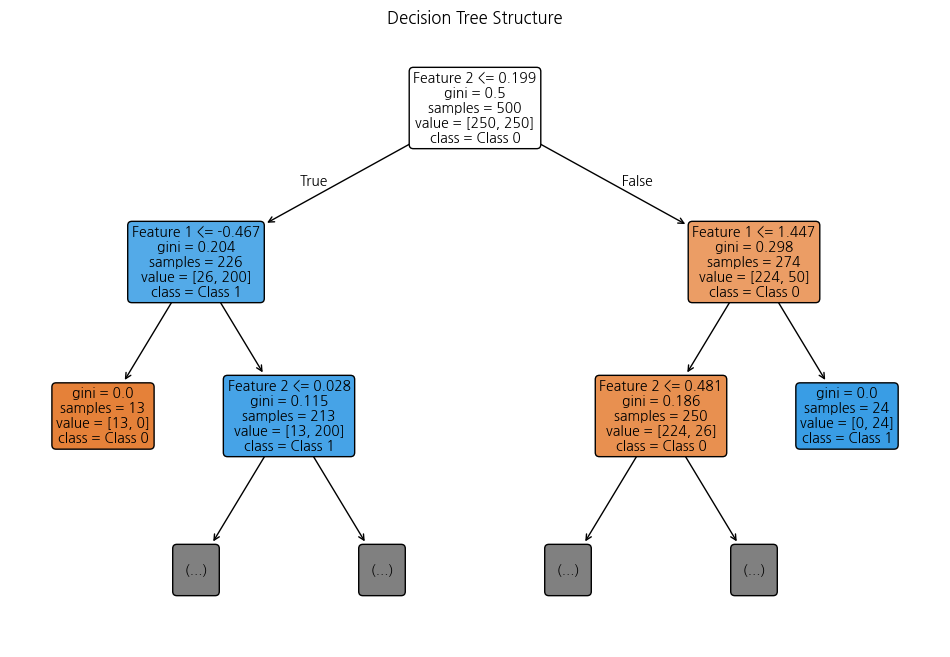

In [7]:
#6. Decision Tree (max_depth=5) – 결정 경계 · Seaborn Heatmap 혼동 행렬 · Classification Report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ── 모델 학습 ──
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
model_dt.fit(X, y)
y_pred = model_dt.predict(X)
acc = accuracy_score(y, y_pred)

# ── 결정 경계 시각화 ──
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_dt.predict_proba(grid)[:,1].reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='bwr')
plt.title(f'Decision Tree (max_depth=5) Decision Boundary\nAccuracy: {acc:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ── Seaborn Heatmap으로 혼동 행렬 ──
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1'],
            yticklabels=['Class 0','Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# ── Classification Report ──
print(f'Accuracy: {acc:.2f}\n')
print(classification_report(y, y_pred))


#7. Decision Tree 구조 시각화
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plot_tree(
    model_dt,
    max_depth=2,
    feature_names=['Feature 1', 'Feature 2'],
    class_names=['Class 0', 'Class 1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Structure')
plt.show()


